# 把dPL模型中其他变量打印出来

## 导入依赖

In [55]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from datetime import datetime, timedelta

load_dotenv()
sys.path.append(os.getenv("PROJ_PATH"))  # type: ignore

from project.better_estimate import load_config  # noqa

## 设置模型配置

In [56]:
config = load_config(r"conf/config_dhbv_hopev2.yaml")
out_path = config["out_path"]

## 加载数据

In [57]:
inner_soilwater1 = np.load(r"E:\PaperCode\dpl-project\generic_deltamodel\project\better_estimate\output\camels_531\train1980-1995\no_multi\LstmMlpModel_E100_R365_B100_H256_256_n16_noLn_noWU_42\Hbv_2\NseBatchLoss\3dyn\test1995-2010_Ep100\soilwater.npy", allow_pickle=True)
inner_soilwater2 = np.load(r"E:\PaperCode\dpl-project\generic_deltamodel\project\better_estimate\output\camels_531\train1980-1995\no_multi\HopeMlpV1_E100_R365_B100_H256_256_n16_noLn_noWU_42\Hbv_2\NseBatchLoss\3dyn\test1995-2010_Ep100\soilwater.npy", allow_pickle=True)

## 将数据转换为月尺度

In [58]:
basin_idx = 2
start_date = datetime(1995,10,1) + timedelta(days=365)
date_range = pd.date_range(start=start_date, periods=inner_soilwater1.shape[0], freq='D')
select_inner_soilwater1 = inner_soilwater1[:, basin_idx, :]
select_inner_soilwater2 = inner_soilwater2[:, basin_idx, :]
select_inner_soilwater1 = (select_inner_soilwater1- select_inner_soilwater1.mean()) / select_inner_soilwater1.std()
select_inner_soilwater2 = (select_inner_soilwater2- select_inner_soilwater2.mean()) / select_inner_soilwater2.std()
out_df = pd.DataFrame({
    'time': date_range,
    'inner_soilwater1': select_inner_soilwater1.flatten(),
    'inner_soilwater2': select_inner_soilwater2.flatten(),
})
out_df.set_index('time', inplace=True)
out_df = out_df.resample('ME').mean()

## 加载ERA5L的数据

In [59]:
era5l_data_path = os.path.join(os.getenv("DATA_PATH"), "era5l_data", "output_soilwater_mm_2000-2010_monthly.csv")
era5l_df = pd.read_csv(era5l_data_path, parse_dates=['time'], index_col='time')
col_names = era5l_df.columns.tolist()
era5l_soil_values = era5l_df[col_names[0]].values
era5l_soil_values = (era5l_soil_values - era5l_soil_values.mean()) / era5l_soil_values.std()

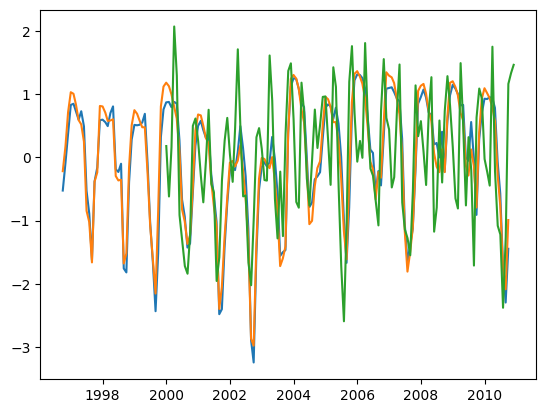

In [60]:
plt.plot(out_df.index, out_df['inner_soilwater1'], label='Inner Evap 1')
plt.plot(out_df.index, out_df['inner_soilwater2'], label='Inner Evap 1')
plt.plot(era5l_df.index, era5l_soil_values, label='ERA5L Evaporation')